# A Unit Test for BOCD




In [6]:
import numpy
import numpy.random
import numpy.linalg
from functools import partial
from bocd import BOCD, StudentT, constant_hazard
import matplotlib.pyplot as plt
import seaborn as sns
import mne

from tqdm import tqdm

LAMBDA = 100
ALPHA = 0.1
BETA = 1.
KAPPA = 1.
MU = 0.
DELAY = 15
THRESHOLD = 0.5

def synthetic_data():
    xs = numpy.random.normal(size=1000)
    xs[len(xs) // 4:len(xs) // 2] += 10.
    xs[len(xs) // 2:3 * len(xs) // 4] -= 10.
    return xs

def get_BOCD_changepoints(series):
    """return detected changepoints.
    """
    bocd = BOCD(partial(constant_hazard, LAMBDA),
                StudentT(ALPHA, BETA, KAPPA, MU))
    changepoints = []
    for x in tqdm(series[:DELAY], desc="pre"):
        bocd.update(x)
    for x in tqdm(series[DELAY:], desc="main"):
        bocd.update(x)
        if bocd.growth_probs[DELAY] >= THRESHOLD:
            changepoints.append(bocd.t - DELAY + 1)

    return changepoints

In [7]:
data = synthetic_data()
# data


main: 100%|██████████| 985/985 [00:00<00:00, 1240.56it/s]


changepoints: [250, 500, 750]


<AxesSubplot:>

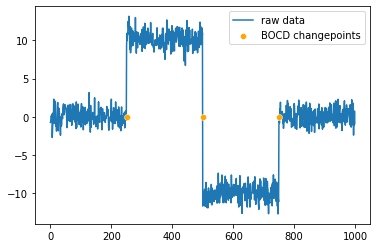

In [8]:
def plot_BOCD_changepoints(data):
    changepoints = get_BOCD_changepoints(data)
    print(f"changepoints: {changepoints}")
    sns.lineplot(data=data, label="raw data")
    return sns.scatterplot(x=changepoints, y=[0] * len(changepoints), color='orange', zorder=3, label="BOCD changepoints")

plot_BOCD_changepoints(data)

# Now with EEG


### Patient: pat_800
### Seizure Number: 3
### File Location: ['/DATA/epilepsiae/surfCO/pat_800/adm_80100/rec_8010200/8010200_0006.data']


In [9]:
# %matplotlib qt
raw_path = r'../../input/raw_eeg/8010200_0006.data'
raw = mne.io.read_raw_nicolet(raw_path, ch_type='eeg', preload=True)

Reading header...
Reading 0 ... 345809  =      0.000 ...   675.408 secs...


In [10]:
raw

<RawNicolet | 8010200_0006.data, 35 x 345810 (675.4 s), ~92.4 MB, data loaded>

In [11]:
# raw.plot()

Effective window size : 4.000 (s)


<ipython-input-12-5c1619f060bc>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(1,100, xscale='log')


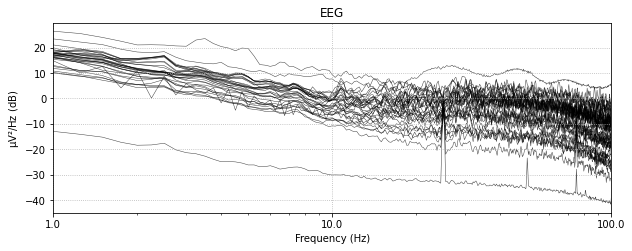

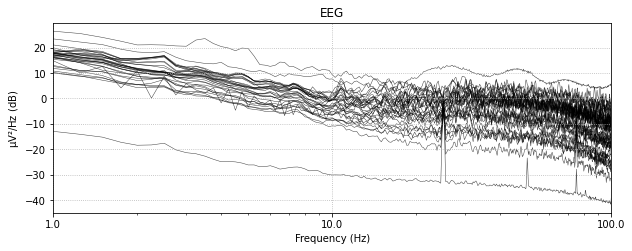

In [12]:
raw.plot_psd(1,100, xscale='log')

In [13]:
df = raw.to_data_frame()

In [14]:
data = df['FP1']

<AxesSubplot:ylabel='Frequency'>

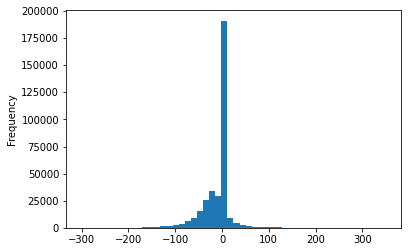

In [15]:
data.plot.hist(bins=50)

<AxesSubplot:>

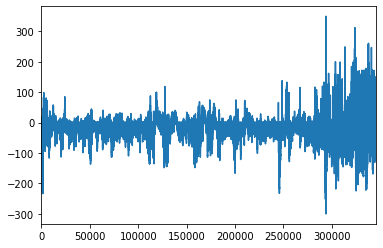

In [16]:
data.plot.line()

In [17]:
plot_BOCD_changepoints(data)

main:  16%|█▌        | 53779/345795 [10:45<1:30:22, 53.85it/s]

In [ ]:
plot_BOCD_changepoints(df['FP2'])

In [ ]:
plot_BOCD_changepoints(df['T7'])

In [ ]:
plot_BOCD_changepoints(df['T8'])

In [ ]:
plot_BOCD_changepoints(df['T9'])

In [ ]:
plot_BOCD_changepoints(df['T10'])

In [ ]:
plot_BOCD_changepoints(df['ECG'])

In [ ]:
plot_BOCD_changepoints(df['F7'])

In [ ]:
plot_BOCD_changepoints(df['F3'])

In [ ]:
plot_BOCD_changepoints(df['F4'])

In [ ]:
plot_BOCD_changepoints(df['F8'])